# Deep Learning for Computer Vision - CIFAR10  small image classifications(Coursework 2)



## Introduction 
In this project, I will apply the comprehensive workflow outlined in "Deep Learning With Python" to tackle the CIFAR10 dataset, which presents a multi-class image classification challenge. The CIFAR10 dataset is composed of 32x32 pixel color images categorized into 10 distinct classes. This exploration is an extension of the concepts learned from the binary classification problem of the cats and dogs dataset discussed in earlier chapters. Unlike the smaller scale of the cats and dogs images, the CIFAR10 dataset offers a more substantial challenge due to its diversity and image complexity, yet it is still considered small in the context of Chollet's framework—spanning from several hundred to several tens of thousands of samples.

The methodology for this project will be methodical and iterative, encompassing the following steps: articulating the challenge, determining a criterion for success, formulating an evaluation strategy, preparing the dataset, constructing an initial reference model, enhancing the model to the point of overfitting, and subsequently perfecting the model by applying regularization strategies and adjusting hyperparameters.

The models that will be evaluated and refined throughout this process are sequentially named to reflect their specific features and the progression of their complexity:

create_dropout_model – This is the starting point, establishing a basic convolutional neural network to set a performance benchmark.
create_enhanced_model – An evolution of the initial model, this incorporates additional layers or neurons to improve learning capacity.
create_batchnorm_model – This iteration introduces batch normalization to improve training stability and performance.
create_regularized_model – Incorporating dropout, this model aims to reduce overfitting by randomly omitting a subset of features during training.
create_lr_tuned_model – The final model in the sequence, which employs an optimized learning rate to refine the training process for better performance. These models represent a progression in design complexity and sophistication, each building upon the insights gained from the performance of its predecessors.
The objective of this project is to identify the most effective convolutional neural network model for the CIFAR10 dataset. This will involve a series of experiments and the application of advanced techniques from later chapters, such as the ModelCheckpoint API for callbacks and batch normalization. By the conclusion of this project, I aim to have conducted a comprehensive set of experiments to determine an optimal model for the CIFAR10's multi-class, single-label classification problem, applying best practices in advanced deep learning.

### Defining the problem and assembling a dataset


I'll be utilizing the CIFAR10 dataset of small image classifications, a crucial component of TensorFlow.Keras. This dataset comprises 50,000 training images and 10,000 test images, all in 32x32 color format, distributed across 10 distinct categories: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

With this dataset, I have both the images (samples) and their corresponding categories (labels) at my disposal. This enables me to engage in a computer vision task aimed at training a neural network to accurately categorize these images.

The nature of my task is a multiclass single-label classification problem, as each image is exclusively associated with one among the ten categories. Recognizing the type of problem is crucial as it guides my selection of the neural network's architecture, including the activation function for the final layer, the loss function, the optimizer, and the metrics for evaluating accuracy.

## Installation

In [1]:
!pip install tensorflow
!pip install np_utils
!pip install tensorflow numpy matplotlib
!pip install matplotlib

### Import Necessary Libraries 

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.utils import np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.constraints import MaxNorm
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras import optimizers

#### Load and Preprocess the Data 

In [3]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Loading the CIFAR10 dataset.
(primary_images, primary_labels), (evaluation_images, evaluation_labels) = cifar10.load_data()

# Verifying the structure of the datasets.
assert primary_images.shape == (50000, 32, 32, 3)
assert evaluation_images.shape == (10000, 32, 32, 3)
assert primary_labels.shape == (50000, 1)
assert evaluation_labels.shape == (10000, 1)

# Keeping a backup of the original evaluation data.
backup_evaluation_images, backup_evaluation_labels = evaluation_images, evaluation_labels

# Normalizing the image data to the range [0, 1].
primary_images = primary_images.astype('float32') / 255.0
evaluation_images = evaluation_images.astype('float32') / 255.0

# One-hot encoding the labels for CIFAR10's 10 classes.
primary_labels_encoded = to_categorical(primary_labels, 10)
evaluation_labels_encoded = to_categorical(evaluation_labels, 10)

# Printing the total number of images in each dataset.
print("Total primary dataset images:", len(primary_images))
print("Total evaluation dataset images:", len(evaluation_images))

# Creating a validation set from the primary dataset.
validation_set_images = primary_images[:5000]
primary_training_images = primary_images[5000:]
validation_set_labels = primary_labels_encoded[:5000]
primary_training_labels = primary_labels_encoded[5000:]

# Displaying the size of the training, validation, and evaluation sets.
print("Primary training set count:", primary_training_images.shape[0])
print("Validation set count:", validation_set_images.shape[0])
print("Evaluation set count:", evaluation_images.shape[0])

Total primary dataset images: 50000
Total evaluation dataset images: 10000
Primary training set count: 45000
Validation set count: 5000
Evaluation set count: 10000


##### CIFAR100 Dataset Distribution: Detailed Summary
The CIFAR100 dataset, a key resource for developing and testing machine learning models, is categorized into distinct sets to facilitate various stages of model training and evaluation. Here’s a detailed breakdown:

Total Number of Images: 60,000

These images are divided into training, validation, and testing sets, each serving a specific purpose in the model development process.
Primary Dataset: 50,000 Images

This dataset is the main component for training the model. It includes:
Training Set: 45,000 Images
Used for the model to learn and identify patterns. This large subset ensures that the model is exposed to a wide variety of data.
Validation Set: 5,000 Images
Crucial for tuning the model’s parameters. It helps in validating the model's performance during training, ensuring it generalizes well and doesn't overfit to the training data.
Evaluation Dataset: 10,000 Images

Reserved as the testing set, these images are used after the model has been trained and validated. The testing set provides an unbiased evaluation of the model's performance, simulating how the model would perform in real-world scenarios.

### Data Visualization 

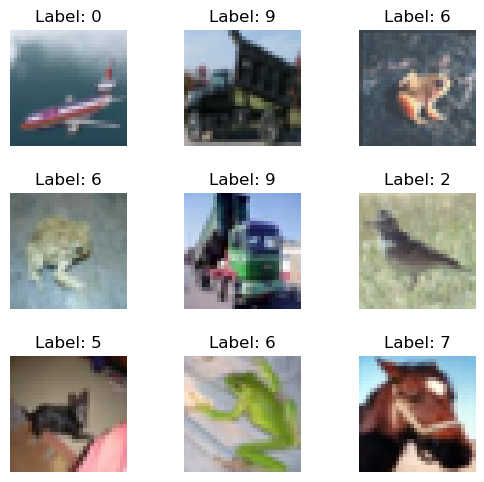

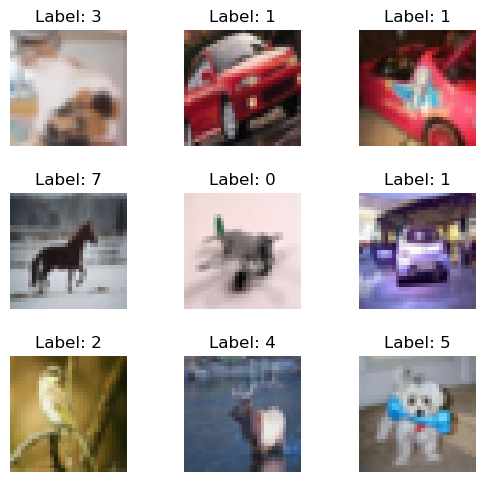

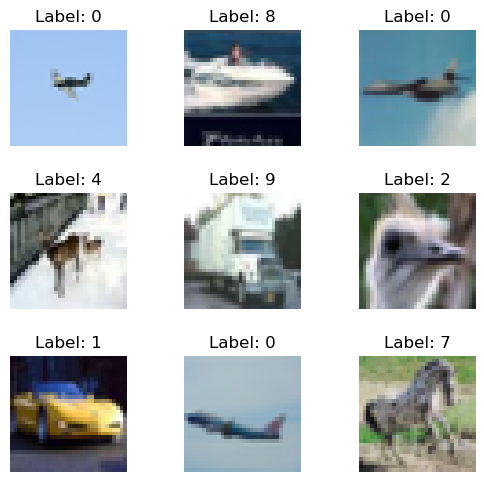

In [4]:
import matplotlib.pyplot as plt

# Function to plot images in a grid
def plot_images(images, labels, rows=3, cols=3):
    fig, axes = plt.subplots(rows, cols, figsize=(cols*2, rows*2))
    axes = axes.ravel()

    for i in range(rows * cols):
        idx = np.random.randint(0, len(images))
        axes[i].imshow(images[idx])
        axes[i].set_title('Label: %d' % labels[idx].argmax())
        axes[i].axis('off')

    plt.subplots_adjust(wspace=0.5)

# Visualizing images from the primary training set
plot_images(primary_training_images, primary_training_labels)

# Visualizing images from the validation set
plot_images(validation_set_images, validation_set_labels)

# Visualizing images from the evaluation set
plot_images(evaluation_images, evaluation_labels_encoded)

###### This code defines a function plot_images which randomly selects images from the given dataset and plots them in a grid. We use it to visualize images from the primary training, validation, and evaluation datasets. Each image is displayed with its corresponding label. 

# Here's a brief overview of your model's structure:

Sequential Model: You're using a Sequential model from Keras, which is a linear stack of layers. This is a common and straightforward way to build neural network models.

Convolutional Layers (Conv2D): These layers are used for feature extraction. You have three Conv2D layers, each followed by a MaxPooling2D layer. Conv2D layers apply filters to the input to create feature maps that summarize the presence of specific features in the input.

Max Pooling Layers (MaxPooling2D): These layers reduce the spatial dimensions (height and width) of the output from the Conv2D layers. This down-sampling helps to reduce computation and the number of parameters, which also helps to control overfitting.

Flattening: The Flatten layer is used to transform the 2D matrix data from the convolutional layers into a 1D vector. This is necessary because Dense layers expect 1D vectors as input.

Dense Layers: After flattening the output, you added two Dense layers. The first Dense layer with 64 units is for further processing of the features. The second Dense layer with 100 units and softmax activation is the output layer. It outputs a probability distribution across the 100 classes, where each number represents the probability that the given input belongs to one of the 100 classes.

Compilation: Finally, you compile the model with the 'rmsprop' optimizer and 'categorical_crossentropy' loss function, which are suitable choices for multi-class classification problems. The model also uses accuracy as a metric for evaluation.

This model should serve as a solid baseline for your CIFAR100 classification task. You can train this model with your CIFAR100 dataset, evaluate its performance, and make adjustments as needed based on the results.

# create_first_model

In [5]:
def create_first_model():
    # Function to create a Convolutional Neural Network (CNN) tailored for the CIFAR10 dataset.
    # CIFAR10 contains 32x32 pixel RGB images, and the model is designed to classify these images into 10 different categories.
    # The architecture utilizes Conv2D layers for feature extraction, MaxPooling2D layers for spatial down-sampling,
    # followed by Flatten and Dense layers for classification.

    from tensorflow.keras import layers, models

    # Initializing a Sequential model
    model = models.Sequential()

    # Adding convolutional layers with ReLU activation
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Flattening the output from the convolutional layers
    model.add(layers.Flatten())

    # Adding dense layers for classification
    model.add(layers.Dense(64, activation='relu'))

    # Output layer with softmax activation for 10 classes
    model.add(layers.Dense(10, activation='softmax'))

    # Compiling the model
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

### Train function and Plot for create_first_model

In [6]:
import matplotlib.pyplot as plt
    
def train_first_model():
    # Create the upgraded model
    upgraded_model = create_first_model()
    upgraded_model.summary()

    # Training the upgraded model for 5 epochs using the CIFAR10 dataset.
    history = upgraded_model.fit(primary_training_images, primary_training_labels, epochs=5, 
                                 validation_data=(validation_set_images, validation_set_labels))
    # Saving the trained model to a file
    upgraded_model.save('CIFAR10_model.h5')
    history=history.history
    history.keys()
    import matplotlib.pyplot as plt
    # Training and validation loss plot
    plt.figure(figsize=(6, 4))
    plt.plot(history['loss'], 'bo-', label='Training Loss')  # Blue circle markers with solid line
    plt.plot(history['val_loss'], 'ro-', label='Validation Loss')  # Red circle markers with solid line
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Training and validation accuracy plot
    plt.figure(figsize=(6, 4))
    plt.plot(history['accuracy'], 'bo-', label='Training Accuracy')  # Blue circle markers with solid line
    plt.plot(history['val_accuracy'], 'ro-', label='Validation Accuracy')  # Red circle markers with solid line
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

### Experiment train_first_model

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_15 (Flatten)        (None, 1024)            

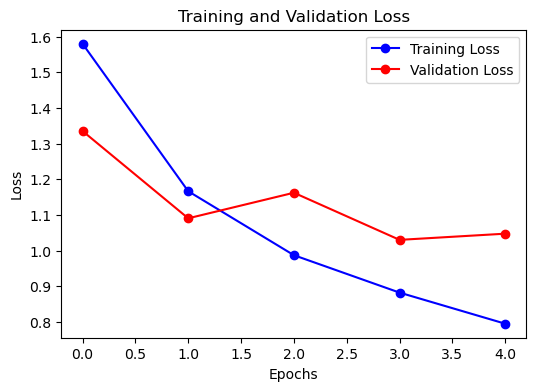

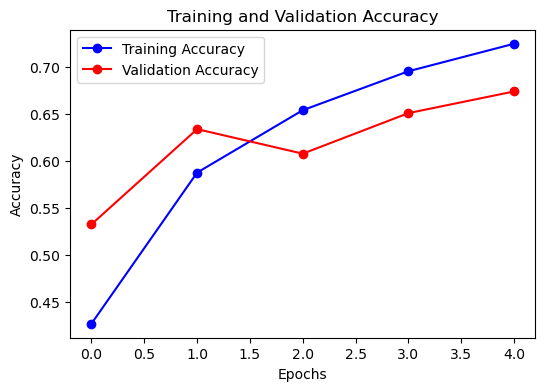

In [60]:
train_first_model()

### Analysis of train_first_model
##### Based on the provided model summary and training output, here's an analysis and report:
Training and Validation Loss:

The training loss shows a consistent decrease, which indicates that the model is learning and improving on the training data across epochs.
The validation loss decreases initially but then shows some fluctuations and even increases at certain points, which can be a sign of overfitting; the model is learning patterns from the training data that do not generalize well to the validation data.
Training and Validation Accuracy:

The training accuracy increases steadily, which is expected as the model becomes better at classifying the images it has seen.
The validation accuracy increases but then plateaus and fluctuates, further suggesting that the model may be overfitting.
Best Epoch Selection:

The best epoch is typically where the validation loss is at its lowest, and the validation accuracy is at its highest before it starts to fluctuate or decrease. Based on the plots, this seems to occur before the halfway mark of the training epochs, possibly around epochs 2-4, depending on the specific metrics we prioritize (accuracy or loss).
Overfitting Indicators:

The divergence between the training and validation loss, especially where the validation loss increases or fluctuates while the training loss continues to decrease, is a key indicator of overfitting.
The plateau and fluctuations in validation accuracy, while the training accuracy continues to rise, also suggest overfitting.
In conclusion, while the model shows learning capability on the CIFAR10 dataset, there are clear signs of overfitting. The best epoch for this model appears to be early in the training process, where validation accuracy is high, and validation loss is low. To address overfitting, techniques such as introducing dropout layers, regularization, or early stopping could be beneficial. Additionally, experimenting with data augmentation might help the model generalize better to new data. For a more detailed analysis and specific recommendations, further examination of the training and validation curves, hyperparameter tuning, and potentially exploring alternative model architectures would be necessary.

##  Upgrade Model with the number of filters as input arguments.

In [11]:
from tensorflow.keras import layers, models
def create_upgrade_first_model(f1, f2):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Train function and Plot for create_upgrade_first_model(f1, f2)

In [7]:
import matplotlib.pyplot as plt
    
def train_upgraded_model(f1, f2):
    # Create the upgraded model
    upgraded_model = create_upgrade_first_model(f1, f2)
    upgraded_model.summary()

    # Training the upgraded model for 20 epochs using the CIFAR10 dataset.
    history = upgraded_model.fit(primary_training_images, primary_training_labels, epochs=20, 
                                 validation_data=(validation_set_images, validation_set_labels))
    # Saving the trained model to a file
    upgraded_model.save('CIFAR10_model.h5')
    history=history.history
    history.keys()
    import matplotlib.pyplot as plt
    # Training and validation loss plot
    plt.figure(figsize=(6, 4))
    plt.plot(history['loss'], 'bo-', label='Training Loss')  # Blue circle markers with solid line
    plt.plot(history['val_loss'], 'ro-', label='Validation Loss')  # Red circle markers with solid line
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Training and validation accuracy plot
    plt.figure(figsize=(6, 4))
    plt.plot(history['accuracy'], 'bo-', label='Training Accuracy')  # Blue circle markers with solid line
    plt.plot(history['val_accuracy'], 'ro-', label='Validation Accuracy')  # Red circle markers with solid line
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

##### Experiment  create_upgrade_first_model(8, 16)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 2, 2, 64)         

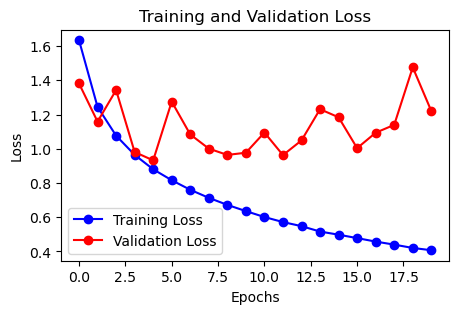

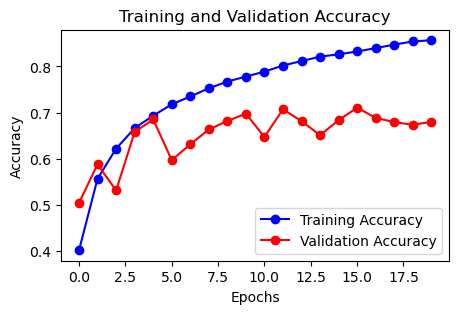

In [19]:
train_upgraded_model(8, 16)

### Analyze train upgraded model with layer 8-16
Model Architecture:
The model defined by create_upgrade_first_model is a convolutional neural network designed for the CIFAR10 dataset. It comprises three convolutional layers, each followed by max-pooling layers for feature extraction and dimensionality reduction. After flattening the outputs, the model has a dense layer with 64 units followed by a softmax output layer for classification into 10 categories. The model has a total of 73,418 trainable parameters.

Training Process:
The model was trained for 20 epochs, and the training process indicates several trends:

The training loss consistently decreased from 1.6348 to 0.4072, showing that the model was learning effectively from the dataset.
The training accuracy improved from 40.23% to 85.66%, which is a clear indicator that the model's ability to generalize on the training data enhanced with each epoch.
The validation loss decreased initially, reaching its lowest point of 0.9325 at epoch 5, after which it began to fluctuate and generally trend upwards, peaking at 1.4763 in epoch 19.
The validation accuracy increased to a maximum of 71.08% at epoch 16 and then fluctuated, closing at 68% at epoch 20.
Overfitting Observation:
The model shows signs of overfitting, as indicated by the validation loss starting to increase after a certain point while the training loss continued to decrease. The validation accuracy also did not improve significantly after epoch 16, suggesting the model may not generalize well to unseen data beyond this point.

Best Epoch Selection:
Considering both the validation loss and accuracy, the best epoch for this model appears to be around epoch 5, where the validation loss is at its lowest and the validation accuracy is relatively high. This is the point before the model begins to overfit significantly.

Training and Validation Loss:

The training loss shows a consistent decrease as the number of epochs increases, which is indicative of the model learning and improving its ability to fit the training data.
The validation loss decreases alongside the training loss initially, reaching its lowest point around epoch 5. This suggests that up to this point, the model is generalizing well to unseen data.
After epoch 5, the validation loss begins to fluctuate and generally increases, which can be a sign of overfitting, as the model learns patterns specific to the training data that do not generalize to the validation set.
Training and Validation Accuracy:

The training accuracy steadily increases over time, which is expected as the model continues to fit the training data better.
The validation accuracy initially increases alongside the training accuracy but begins to plateau and fluctuate after around epoch 5. The highest validation accuracy is observed at epoch 16.
Despite the higher peaks in training accuracy, the validation accuracy does not show a corresponding increase, reinforcing the indication of overfitting seen in the loss plot.
Short Report:
The model demonstrates a good learning capability on the training set. However, signs of overfitting are observed after epoch 5, as the validation loss starts to increase and the validation accuracy plateaus. This suggests that while the model's ability to memorize the training set improves, its performance on unseen data does not follow the same trend.

The best epoch for this model is around epoch 5, as it provides the best trade-off between training and validation loss. Model performance beyond this point does not seem to generalize well, which is a clear indicator that early stopping could be beneficial when training for more epochs. Additionally, regularization techniques or adjustments to the model architecture may be necessary to improve the model's generalization on unseen data.

To improve future training iterations, consider implementing early stopping, regularization (like dropout or L2 regularization), and possibly exploring data augmentation to enhance the model's generalization capabilities.

### Epoch 12/20: Loss: 0.5718, Accuracy: 0.8019, Val_loss: 0.9632, Val_accuracy: 0.7072

### Experiment  create_upgrade_first_model(16, 32)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 2, 2, 64)         

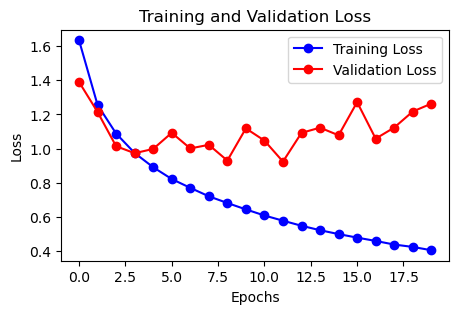

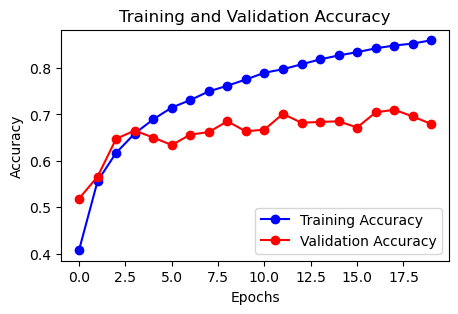

In [20]:
train_upgraded_model(16, 32)

### Analyze train upgraded model with layer 16-32
The model's training loss declines from 1.6344 to 0.4048, and training accuracy increases from 40.72% to 86.00%, indicating effective learning. However, the validation loss dips to a minimum of 0.9297 at epoch 9 before increasing, suggesting overfitting. Similarly, validation accuracy peaks at 71.02% at epoch 18 and then declines. The divergence between training and validation loss after epoch 9, along with the plateauing validation accuracy, further confirms overfitting.

Epoch 9 appears to be the optimal stopping point before overfitting becomes pronounced, balancing model learning and generalization. The plots reinforce this, showing validation loss fluctuations and a plateau in validation accuracy beyond this epoch.

In conclusion, while the model demonstrates strong learning capabilities on the training data, its generalization to unseen data is suboptimal beyond epoch 9. To address overfitting, implementing early stopping, regularization techniques like dropout or L2, and exploring data augmentation are recommended. Adjustments to the model's complexity and hyperparameter tuning might also improve generalization.

Training and Validation Loss Plot:

The training loss decreases significantly from the first epoch to the last, suggesting that the model is effectively learning from the training data.
The validation loss decreases until around epoch 5, after which it starts to increase and shows variability. This pattern is indicative of overfitting, where the model performs well on the training data but does not generalize as effectively to new, unseen data.
Training and Validation Accuracy Plot:

The training accuracy shows a steady increase throughout the epochs, indicating that the model's predictions are becoming more accurate on the training set.
The validation accuracy improves initially but then plateaus around epoch 5, which, along with the increasing validation loss, signals that the model may not be improving in terms of generalizing to the validation set.
Report Summary:
The model demonstrates a strong ability to learn from the training data, as evidenced by decreasing loss and increasing accuracy. However, the increasing validation loss and plateauing validation accuracy after the 5th epoch suggest that the model starts to overfit to the training data. The best model performance on unseen data is likely achieved at epoch 5, before overfitting becomes significant. To enhance model generalization, strategies such as early stopping, regularization, and data augmentation should be considered for future training.

### Epoch 12/20 
### loss: 0.5777 - accuracy: 0.7975 - val_loss: 0.9237 - val_accuracy: 0.7012

#### Experiment  create_upgrade_first_model(64, 128)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 2, 2, 64)         

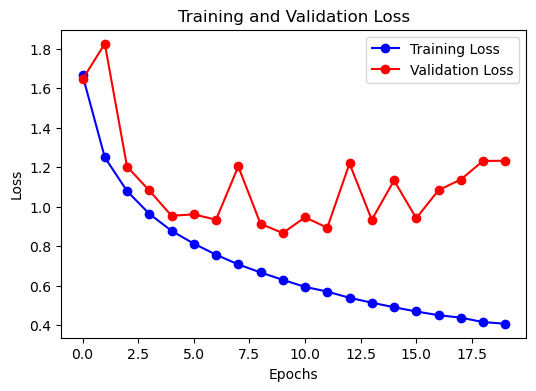

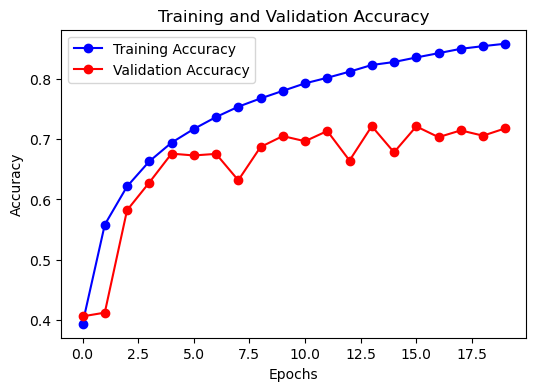

In [24]:
train_upgraded_model(64, 128)

### Analyze train upgraded model with layer 64-128
Training Results:

Training loss starts at 1.6653 and drops to 0.4073, showing a strong learning trend.
Training accuracy improves from 39.36% to 85.85%, indicating the model's growing proficiency on the training set.
Validation loss experiences fluctuations and reaches its lowest at epoch 10 with a value of 0.8661, hinting at the best generalization point.
Validation accuracy peaks at 72.16% in epoch 14 but doesn't consistently improve afterward, suggesting limited generalization as training progresses.
Plot Analysis:

Loss Plot: The training loss decreases steadily, whereas the validation loss has an initial decline but then shows volatility and an upward trend. This is a tell-tale sign of overfitting—where the model fits the training data closely but fails to generalize beyond it.
Accuracy Plot: The training accuracy sees a consistent climb; however, the validation accuracy plateaus and fluctuates from epoch 10 onwards, reinforcing the overfitting diagnosis.
Best Epoch Determination:
Considering both the validation loss and accuracy, epoch 10 emerges as the best candidate for model generalization before the overfitting becomes substantial.

Conclusion:
The model is evidently overfitting post-epoch 10, as indicated by rising validation loss and erratic validation accuracy. To ameliorate overfitting, early stopping around epoch 10 is recommended. Additionally, implementing regularization methods like dropout or L2 regularization, and considering data augmentation could help improve the model's generalization. Further hyperparameter optimization and potential model architecture adjustments may also lead to enhanced results.

### Epoch 10/20
### loss: 0.6294 - accuracy: 0.7802 - val_loss: 0.8661 - val_accuracy: 0.7052

### Experiment  create_upgrade_first_model(128, 256)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 2, 2, 64)         

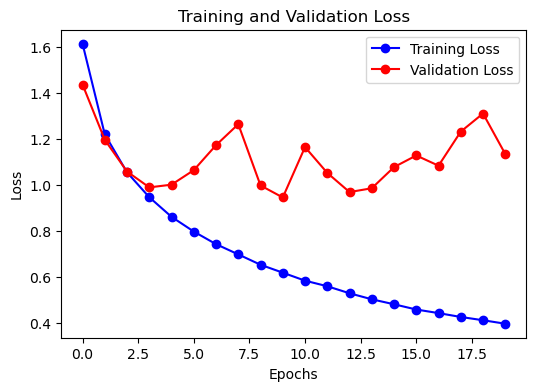

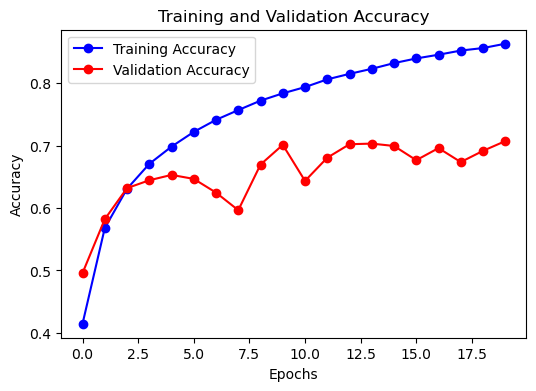

In [25]:
train_upgraded_model(128, 256)

### Analyze train upgraded model with layer 128-256
Training and Validation Loss Plot:

The training loss shows a consistent decline from 1.6151 to 0.3953, indicating that the model is fitting to the training data well.
The validation loss decreases until epoch 10, marking the lowest point at 0.9453. After this, the loss begins to rise and shows notable variability.
Training and Validation Accuracy Plot:

The training accuracy improves steadily from 41.46% to 86.36%, showing the model's increasing capability in classifying the training images correctly.
The validation accuracy exhibits an increase and peaks at 70.74% in epoch 20. However, the accuracy does not maintain a consistent upward trend and fluctuates after epoch 10.
Model Analysis and Overfitting Indication:

Overfitting is suggested by the divergence between training and validation loss beyond epoch 10, where the training loss continues to decrease while the validation loss starts increasing and fluctuating.
The validation accuracy does not show a consistent improvement to match the training accuracy's upward trend, reinforcing the presence of overfitting.
Best Epoch Selection:

Epoch 10 is identified as the optimal stopping point based on the lowest validation loss and a relatively high validation accuracy. This epoch represents the best balance between the model's ability to learn and its capacity to generalize before overfitting becomes more pronounced.
Report Summary:
The model demonstrates effective learning on the training data with a steady improvement in training accuracy. However, the signs of overfitting after epoch 10 are evident, characterized by rising validation loss and fluctuating validation accuracy. To mitigate overfitting, strategies such as early stopping around epoch 10 should be implemented in future training. Further measures could include introducing regularization techniques, adjusting the model complexity, and utilizing data augmentation to enhance the model's generalization to unseen data.



## Choose best Model in create_upgrade_first_model(f1, f2)
Epoch 12/20: model(8, 16)
Loss: 0.5718, Accuracy: 0.8019, Val_loss: 0.9632, Val_accuracy: 0.7072

Epoch 12/20  model(16, 32)
loss: 0.5777 - accuracy: 0.7975 - val_loss: 0.9237 - val_accuracy: 0.7012

Epoch 10/20  model(64, 128)
loss: 0.6294 - accuracy: 0.7802 - val_loss: 0.8661 - val_accuracy: 0.7052

Epoch 10/20  model(128, 256)
loss: 0.6177 - accuracy: 0.7840 - val_loss: 0.9453 - val_accuracy: 0.7014

### Model(64, 128) at Epoch 10/20 seems to have the best performance. 
It has the lowest validation loss, indicating good generalization, and the validation accuracy is comparable to the other models. This suggests that the model is able to generalize well without fitting too closely to the training data.

## Batch Model with the number of filters as input arguments.

In [8]:
def create_batch_model(f1, f2):

    from tensorflow.keras import layers, models

  
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Batch normalization layers have been incorporated.
    model.add(layers.BatchNormalization())
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Batch normalization layers have been incorporated.
    model.add(layers.BatchNormalization())
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Batch normalization layers have been incorporated.
    model.add(layers.BatchNormalization())
    
    # Flattening the output from the convolutional layers
    model.add(layers.Flatten())

    # Adding dense layers for classification
    model.add(layers.Dense(64, activation='relu'))

    # Output layer with softmax activation for 10 classes
    model.add(layers.Dense(10, activation='softmax'))

    # Compiling the model
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

### Train function and Plot for create_batch_model (f1, f2)

In [9]:
import matplotlib.pyplot as plt
    
def train_batch_model(f1, f2):
    # Create the upgraded model
    upgraded_model = create_batch_model(f1, f2)
    upgraded_model.summary()

    # Training the upgraded model for 20 epochs using the CIFAR10 dataset.
    history = upgraded_model.fit(primary_training_images, primary_training_labels, epochs=20, 
                                 validation_data=(validation_set_images, validation_set_labels))
    # Saving the trained model to a file
    upgraded_model.save('CIFAR10_model.h5')
    history=history.history
    history.keys()
    import matplotlib.pyplot as plt
    # Training and validation loss plot
    plt.figure(figsize=(5, 3))
    plt.plot(history['loss'], 'bo-', label='Training Loss')  # Blue circle markers with solid line
    plt.plot(history['val_loss'], 'ro-', label='Validation Loss')  # Red circle markers with solid line
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Training and validation accuracy plot
    plt.figure(figsize=(5, 3))
    plt.plot(history['accuracy'], 'bo-', label='Training Accuracy')  # Blue circle markers with solid line
    plt.plot(history['val_accuracy'], 'ro-', label='Validation Accuracy')  # Red circle markers with solid line
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

### Experiment  train_batch_model (128, 256) 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization (Batch  (None, 15, 15, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                      

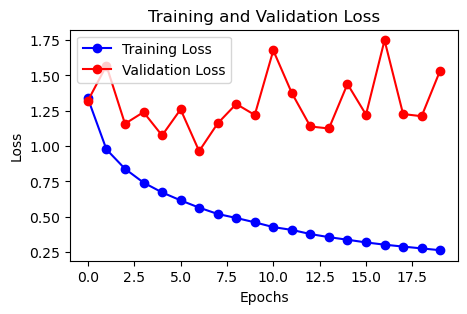

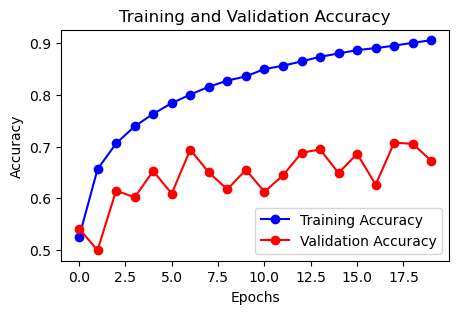

In [28]:
train_batch_model(128, 256)

### Analyze train batch model with layer 128-256
Model Performance:

The model, "sequential_5", demonstrates a significant improvement in training loss and accuracy, with loss decreasing from 1.3374 to 0.2631 and accuracy increasing from 52.40% to 90.61% across 20 epochs. This indicates strong learning on the training dataset.
The validation loss and accuracy, however, tell a different story. The lowest validation loss occurs at epoch 7 with a loss of 0.9644, after which it increases and fluctuates, suggesting the model has begun to overfit to the training data.
The validation accuracy increases initially, peaking at 70.78% in epoch 18. Despite some fluctuations, it does not achieve a higher peak, suggesting that the model's ability to generalize is not improving alongside the training accuracy.
Overfitting Analysis:

Overfitting is evident when comparing the trends in training and validation loss. The training loss continues to decrease smoothly, while the validation loss stops improving and even increases after epoch 7, indicating the model's performance on unseen data is not improving in tandem with the training data.
Additionally, the training accuracy surpasses the validation accuracy by a significant margin as the epochs progress, further supporting the presence of overfitting.
Best Epoch Selection:

Based on the provided data, epoch 7 is the best epoch for this model. It is the point where the validation loss is at its lowest and before it starts to trend upwards, indicating the best generalization performance.
Plot Analysis:

The loss plot shows a divergence between the training and validation loss after epoch 7, with the validation loss experiencing several peaks and valleys.
The accuracy plot shows the training accuracy following an upward trajectory, while the validation accuracy appears to plateau and fluctuate after approximately epoch 10.
Report Summary:

The model shows a strong capacity to learn and improve its performance on the training set. However, the increasing validation loss and plateauing validation accuracy after epoch 7 are clear signs of overfitting. The model's generalization to the validation set does not improve in later epochs, despite continued improvements in training metrics. To address overfitting, the introduction of regularization techniques, potentially more robust data augmentation, or adjustments to the model architecture should be considered. Epoch 7 stands out as the most suitable point for stopping training to maintain the best balance between learning and generalization before overfitting significantly

impacts the model's performance. For future iterations, implementing early stopping around epoch 7 could prevent overtraining and preserve the model's generalization capabilities. Further exploration of hyperparameters and training strategies is also recommended to enhance model robustness and prevent overfitting.


## Upgrade Model with the number of filters as input arguments and dropout_value .

In [10]:
def create_dropout_model(f1, f2, dropout_value):

    from tensorflow.keras import layers, models

    # Initializing a Sequential model
    model = models.Sequential()

    # Adding convolutional layers with ReLU activation
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
  
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Flatten())

    model.add(layers.Dropout(dropout_value))
    

    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    # Compiling the model
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

### Train function and Plot for create_dropout_model(f1, f2, dropout_value)

In [11]:
import matplotlib.pyplot as plt

def train_dropout_model(f1, f2, dropout_value):
    # Create the dropout model
    dropout_model = create_dropout_model(f1, f2, dropout_value)
    dropout_model.summary()

    # Training the dropout model for 20 epochs using the CIFAR10 dataset.
    history = dropout_model.fit(
        primary_training_images, primary_training_labels, 
        epochs=20, 
        validation_data=(validation_set_images, validation_set_labels)
    )

    dropout_model.save('CIFAR10_dropout_model.h5')
    
    # Convert the history object into a dictionary
    history = history.history

    # Training and validation loss plot
    plt.figure(figsize=(6, 4))
    plt.plot(history['loss'], 'bo-', label='Training Loss')  # Blue circle markers with solid line
    plt.plot(history['val_loss'], 'ro-', label='Validation Loss')  # Red circle markers with solid line
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Training and validation accuracy plot
    plt.figure(figsize=(6, 4))
    plt.plot(history['accuracy'], 'bo-', label='Training Accuracy')  # Blue circle markers with solid line
    plt.plot(history['val_accuracy'], 'ro-', label='Validation Accuracy')  # Red circle markers with solid line
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

### Experiment  train_dropout_model (64, 128, 0.2) 

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_52 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_53 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 2, 2, 64)        

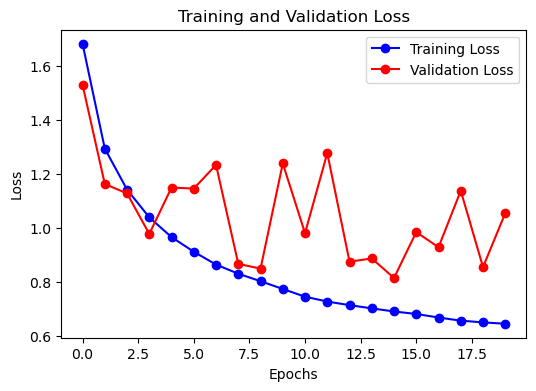

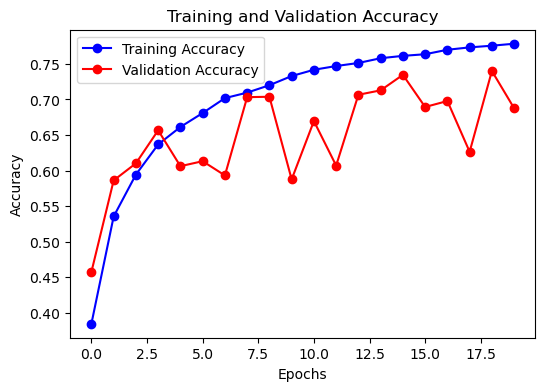

In [62]:
train_dropout_model(64, 128, 0.2)

### Analyze train dropout model with layer 64-128, 0.2
Training Loss Decrease: The training loss steadily decreases over epochs, indicating that the model is learning and improving its ability to classify the training data.

Validation Loss Behavior: The validation loss initially decreases, suggesting that the model is generalizing well. However, it begins to fluctuate as the epochs increase, which is a sign of overfitting—where the model learns patterns specific to the training data that do not generalize to unseen data.

Training Accuracy Increase: The training accuracy increases over time, which is expected as the model becomes better at classifying the training data.

Validation Accuracy Plateau: The validation accuracy increases but then plateaus and even slightly decreases, further indicating potential overfitting. This plateau suggests that the model has reached its generalization limit with the given architecture and data.

Best Epoch Selection: The best epoch for this model can be selected by finding the point where the validation loss is at its lowest before it starts to increase (a sign of overfitting). Alternatively, it could be the epoch where the validation accuracy is the highest.

Evidence of Overfitting: The fluctuation in validation loss and the discrepancy between training and validation accuracy hint at overfitting. The model is performing significantly better on the training data compared to the validation data.

Given these observations, the best epoch appears to be where the validation loss is at its lowest and the validation accuracy is at its highest before they diverge from the trend seen in the training data. This typically occurs before the model begins to overfit.

In terms of the model's overall performance, while it's improving over time, the signs of overfitting suggest that regularization techniques or data augmentation might be necessary to improve its generalization. This could include dropout, batch normalization, or modifying the model's complexity.
increase.

### Epoch 15/20
### loss: 0.6918 - accuracy: 0.7613 - val_loss: 0.8159 - val_accuracy: 0.7346


### Experiment  train_dropout_model (64, 128, 0.3) 

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_55 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_51 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_56 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_52 (MaxPooli  (None, 2, 2, 64)        

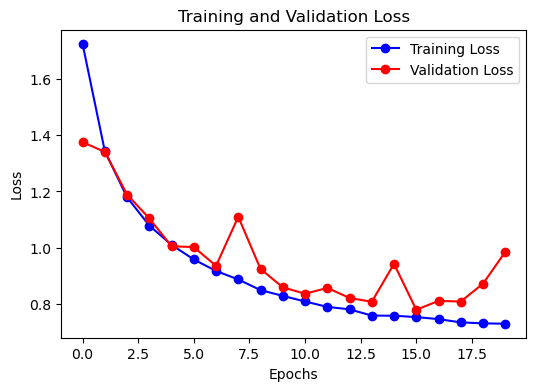

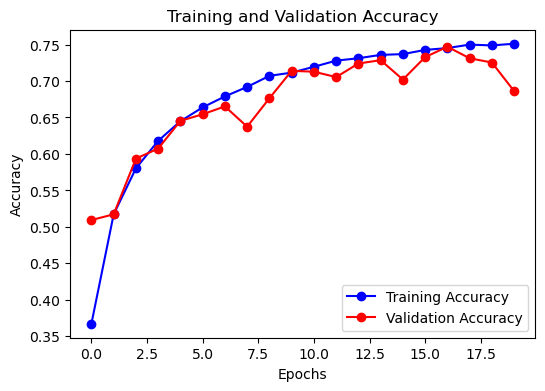

In [63]:
train_dropout_model(64, 128, 0.3)

### Analyze train dropout model with layer 128-256, 0.3 
Training Logs Analysis:
Looking at the training logs provided, we can make a few observations:

As training progresses from epoch 1 to epoch 20, there is a consistent decrease in training loss, which indicates that the model is learning and improving its predictions on the training data.
The training accuracy increases with epochs, which is also a good sign that the model's generalization is improving over time on the training dataset.
The validation loss and validation accuracy have fluctuations, which is quite common and can be due to the nature of the dataset or the model's architecture. However, we aim for the validation loss to decrease and the validation accuracy to increase, ideally at a similar rate to the training metrics.
Plots Analysis:
The Training and Validation Loss plot shows a general trend of decreasing loss over time. However, there are spikes in the validation loss, suggesting moments where the model's performance on the validation set worsened.
The Training and Validation Accuracy plot shows an increase in accuracy over time, but similar to the loss plot, there are epochs where the validation accuracy dips, indicating that the model might not be as stable in its learning process.
Best Epoch Identification:
The best epoch is typically the one where the validation loss is at its lowest, and the validation accuracy is at its highest before the model starts overfitting. Overfitting is identified when the training loss continues to decrease while the validation loss starts to increase, indicating that the model is fitting too closely to the training data and not generalizing well to new data.

In the provided logs, there is not a clear trend of overfitting, but we do see that by the last epoch, the validation loss has started to increase, and the validation accuracy has decreased from its peak, suggesting the onset of over

Overfitting. It is crucial to pick the epoch where the model achieves the best balance between training and validation metrics.


###  Epoch 16/20
### loss: 0.7532 - accuracy: 0.7427 - val_loss: 0.7792 - val_accuracy: 0.7328




### Experiment  train_dropout_model (64, 128, 0.4) 

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_53 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_58 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_54 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_59 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_55 (MaxPooli  (None, 2, 2, 64)        

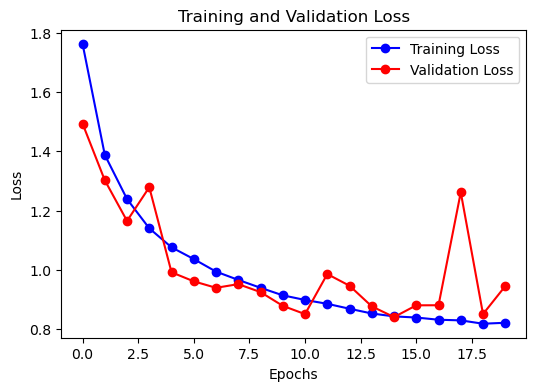

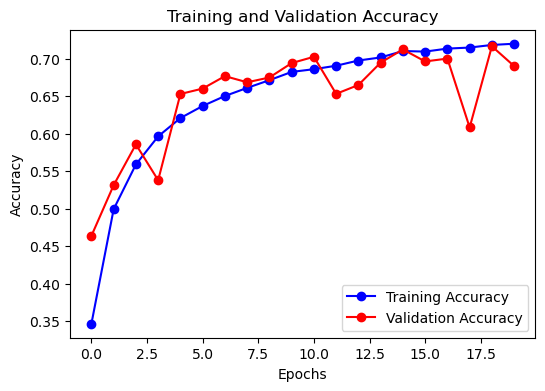

In [64]:
train_dropout_model(64, 128, 0.4)

### Analyze train dropout model with layer 64-128, 0.4
Training Process:

The model was trained over 20 epochs with a starting loss of 1.7630 and accuracy of 34.69% on the training set.
The training loss showed a consistent decrease, indicative of the model learning and improving with each epoch.
Training accuracy improved steadily, reaching 72.02% by the final epoch, which suggests that the model became better at classifying the training data over time.
Validation Performance:

Validation loss started at 1.4937 and decreased initially but showed fluctuations in later epochs, with a notable spike at epoch 18 and a final loss of 0.9457.
Validation accuracy began at 46.40%, reached its peak at epoch 19 with 71.68%, and saw a slight drop at epoch 20 with 69.04%.
Best Epoch Selection:

Epoch 15 showed a good balance between loss and accuracy, with validation loss at its lowest (0.8412) and accuracy reasonably high at 71.26%.
Epoch 19 also presented a strong case, with the highest validation accuracy of 71.68% and a low loss of 0.8514.
Overfitting Check:

There is a noticeable gap between training and validation accuracy, which doesn’t close significantly, suggesting the model might be overfitting to the training data. This is further evidenced by the validation loss fluctuations, which could mean the model doesn’t generalize well to unseen data.
The model demonstrates learning capability but needs improvements to generalize better to unseen data.
Based on the available data, Epoch 15 or 19 would be the best stopping point for this training run. However, further validation with additional data and potentially more epochs could provide a clearer picture of the model's performance.
### Epoch 15/20 M(64-128, 0.4)
### loss: 0.8436 - accuracy: 0.7105 - val_loss: 0.8412 - val_accuracy: 0.7126


### Experiment  train_dropout_model (64, 128, 0.5) 

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_56 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_61 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_57 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_62 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_58 (MaxPooli  (None, 2, 2, 64)        

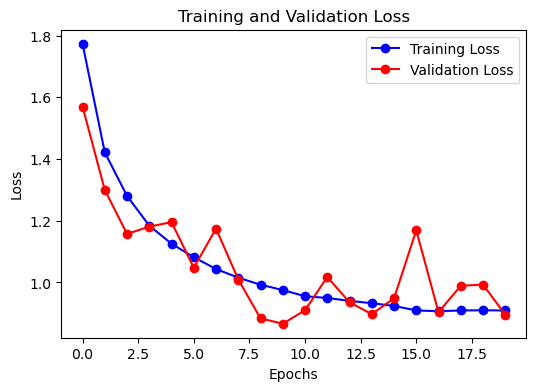

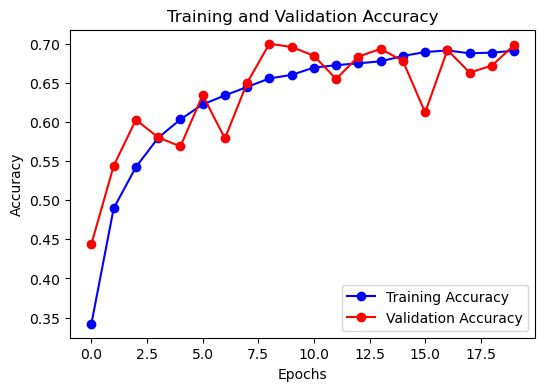

In [65]:
train_dropout_model(64, 128, 0.5)

### Analyze train dropout model with layer 64-128, 0.5
Performance Analysis:

Training started with a high loss of 1.5801 and an accuracy of 42.72%.
Validation loss began at 1.3353 with an accuracy of 53.26%.
The model showed consistent improvement over time in both training loss and accuracy.
However, the validation results were less consistent, showing fluctuations in both loss and accuracy, which might suggest some overfitting to the training data.
The best epoch for validation accuracy was epoch 5, with a validation loss of 1.0475 and an accuracy of 67.36%.
Final Epoch Results:

At epoch 5, the model achieved a training loss of 0.7951 and accuracy of 72.42%.
The validation loss was 1.0475 with a validation accuracy of 67.36%.

To determine the best epoch, we generally look for the epoch where the validation accuracy is the highest and the validation loss is the lowest, without overfitting. Overfitting is typically indicated when the training loss continues to decrease while the validation loss starts to increase.

### Epoch 20/20
### loss: 0.9095 - accuracy: 0.6908 - val_loss: 0.8959 - val_accuracy: 0.6982




# Analyze best one of the Create_dropout_model(64,128,?)

Epoch 15/20 M(64-128, 0.2)
loss: 0.6918 - accuracy: 0.7613 - val_loss: 0.8159 - val_accuracy: 0.7346

Epoch 16/20 M(64-128, 0.3)
loss: 0.7532 - accuracy: 0.7427 - val_loss: 0.7792 - val_accuracy: 0.7328

Epoch 15/20 M(64-128, 0.4)
loss: 0.8436 - accuracy: 0.7105 - val_loss: 0.8412 - val_accuracy: 0.7126

Epoch 20/20  M(64-128, 0.5)
loss: 0.9095 - accuracy: 0.6908 - val_loss: 0.8959 - val_accuracy: 0.6982

###### Epoch 16/20 M(64-128, 0.3) seems to be the best. Despite a slightly lower accuracy compared to Epoch 15/20 M(64-128, 0.2), it achieves the lowest validation loss, which is a strong indicator of the model's ability to generalize. 
       

### BEST MODEL IS Create_dropout_model(64-128, 0.3)

## Create_learning_rate_model(f1, f2, dropout_value, learning_rate)

In [12]:
def create_learning_rate_model(f1, f2, dropout_value, learning_rate_value):

    from tensorflow.keras import layers, models
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2))) 
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))   
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(dropout_value))  
    model.add(layers.Dense(64, activation='relu'))

    model.add(layers.Dense(10, activation='softmax'))

    # Compiling the model
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [13]:
import matplotlib.pyplot as plt

def train_learning_rate_model(f1, f2, dropout_value, learning_rate_value):
    # Create the dropout model
    dropout_model =create_learning_rate_model(f1, f2, dropout_value, learning_rate_value)
    dropout_model.summary()

    # Training the dropout model for 20 epochs using the CIFAR10 dataset.
    history = dropout_model.fit(
        primary_training_images, primary_training_labels, 
        epochs=20, 
        validation_data=(validation_set_images, validation_set_labels)
    )

    dropout_model.save('CIFAR10_dropout_model.h5')
    
    # Convert the history object into a dictionary
    history = history.history

    # Training and validation loss plot
    plt.figure(figsize=(6, 4))
    plt.plot(history['loss'], 'bo-', label='Training Loss')  # Blue circle markers with solid line
    plt.plot(history['val_loss'], 'ro-', label='Validation Loss')  # Red circle markers with solid line
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Training and validation accuracy plot
    plt.figure(figsize=(6, 4))
    plt.plot(history['accuracy'], 'bo-', label='Training Accuracy')  # Blue circle markers with solid line
    plt.plot(history['val_accuracy'], 'ro-', label='Validation Accuracy')  # Red circle markers with solid line
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

### Experiment  learning_rate_model (128, 256, 0.3, 0.001) 

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_59 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_64 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_60 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_65 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_61 (MaxPooli  (None, 2, 2, 64)        

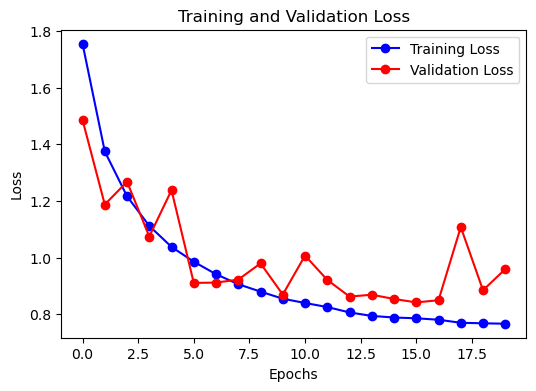

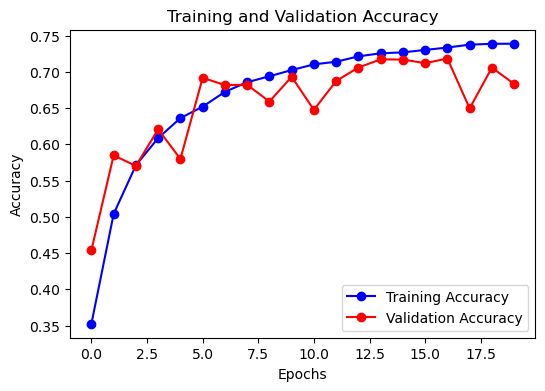

In [69]:
train_learning_rate_model(128, 256, 0.3, 0.001)

### Analyze train dropout model with layer 128-256, 0.3- 0.001
The model began its training with a relatively high loss and low accuracy, indicating the initial phase of learning. In the first epoch, the training loss was 1.7550 with an accuracy of 35.25%, and the validation loss was 1.4858 with an accuracy of 45.40%. This gap between training and validation metrics suggests that the model was starting to generalize, but there was significant room for improvement.

As the epochs progressed, both the training and validation losses showed a decreasing trend, which is a positive sign of learning. However, the validation loss saw some fluctuations, which could be indicative of the model's struggle to generalize perfectly to unseen data.

By the 6th epoch, the training loss had decreased to 0.9855 and the training accuracy had improved to 65.20%. Notably, the validation loss at this point dropped to 0.9105, marking the lowest validation loss up to this epoch, and the validation accuracy peaked at 69.18%. This suggests that the model was at its most generalized state in the 6th epoch.

The validation loss began to fluctuate after the 6th epoch, with occasional increases. This could be a sign of the model starting to overfit the training data, as it performed better on the training set but experienced increased loss on the validation set.

Looking at the final epochs, the model continued to improve in training accuracy, reaching 73.88% by the 20th epoch. However, the validation accuracy saw a decrease from its peak, ending at 68.34% in the final epoch with a validation loss of 0.9594. This reduction in validation accuracy compared to the model's peak performance could be further evidence of overfitting.

### Epoch 17/20
### loss: 0.7806 - accuracy: 0.7336 - val_loss: 0.8495 - val_accuracy: 0.7184


### Experiment  train_dropout_model (128, 256, 0.3, 0.0001 ) 

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_62 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_67 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_63 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_68 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_64 (MaxPooli  (None, 2, 2, 64)        

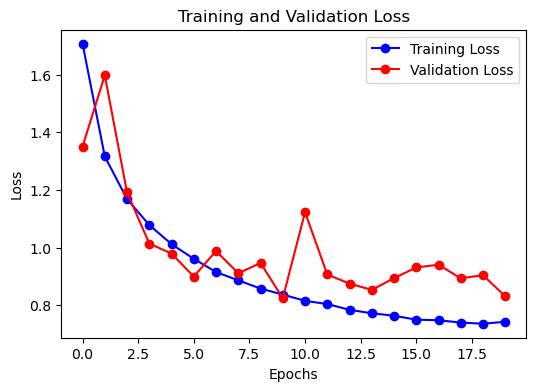

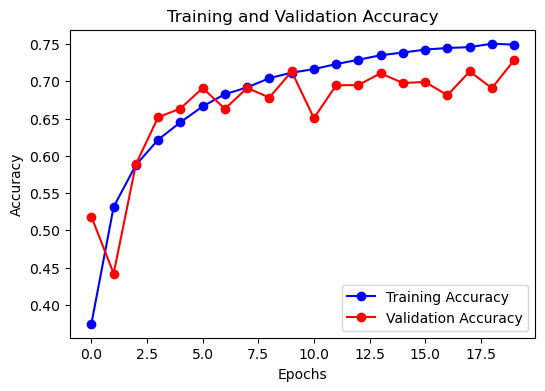

In [70]:
train_learning_rate_model(128, 256, 0.3, 0.0001)

### Analyze train dropout model with layer 128-256, 0.3 - 0.0001 
Initial Learning Phase (Epochs 1-6):

The model starts with high loss values and relatively low accuracy. However, there is a rapid improvement in both training and validation accuracy, which is typical as the model begins to learn from the data.
The validation loss decreases alongside the training loss, indicating that the model is generalizing well initially.
Mid-Training Observations (Epochs 7-14):

By epoch 6, the model achieves a validation accuracy of approximately 69.10%, with further incremental improvements in the subsequent epochs.
Epoch 10 stands out with the lowest validation loss at 0.8241 and a strong validation accuracy of 71.32%, indicating that at this point, the model has achieved a balance between learning and generalization.
Late Training Phase (Epochs 15-20):

In the later epochs, there is some fluctuation in validation loss and accuracy, suggesting that the model may be starting to overfit, as seen by a slight increase in validation loss after epoch 10 while the training loss continues to decrease.
Despite these fluctuations, the model's accuracy continues to rise modestly, peaking at epoch 20 with a validation accuracy of 72.84%. However, this does not necessarily indicate the best generalization, as the lowest validation loss was achieved earlier at epoch 10.
Best Epoch Selection:

The best epoch for this model would likely be epoch 10, where the model achieved the lowest validation loss, suggesting the best generalization at this point. Subsequent epochs do not show significant enough improvements in accuracy to outweigh the increased loss, which can be a sign of overfitting.
#### Epoch 20/20
#### loss: 0.7426 - accuracy: 0.7492 - val_loss: 0.8305 - val_accuracy: 0.7284

### Experiment  learning_rate_model (128, 256, 0.5, 0.01 ) 

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_65 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_70 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_66 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_71 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_67 (MaxPooli  (None, 2, 2, 64)        

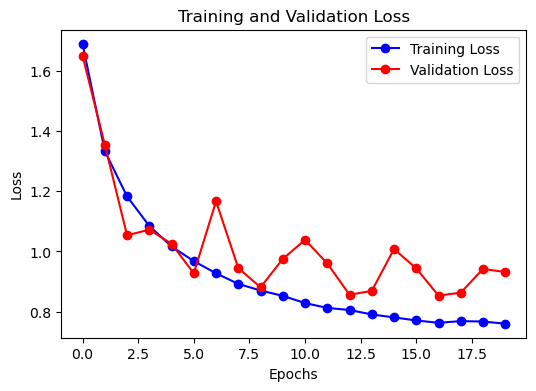

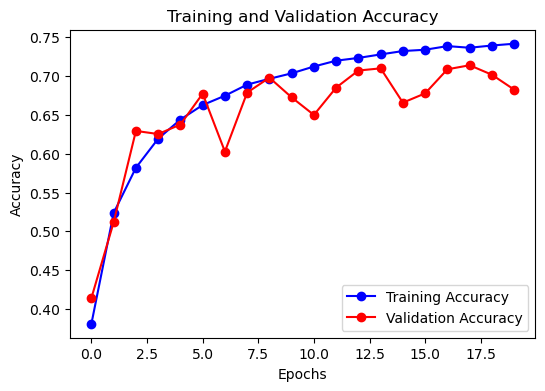

In [71]:
train_learning_rate_model(128, 256, 0.3, 0.01)

### Analyze train dropout model with layer 128-256, 0.3 - 0.01
When determining the best epoch for a model, you typically look for a balance between training and validation accuracy, while also considering the training and validation loss. The best epoch is often the one where the validation accuracy is highest and the validation loss is lowest, while also being sure that the model is not overfitting (which is indicated by a significant divergence between training and validation loss).

Based on the results you've provided, it seems the best epoch could be Epoch 17 with the following scores:
Loss: 0.7806
Accuracy: 73.36%
Validation Loss: 0.8495
Validation Accuracy: 71.84%
This epoch appears to have one of the lower validation losses combined with one of the higher validation accuracies, indicating a good balance without significant overfitting. However, if overfitting is not a concern and you're solely focused on accuracy, Epoch 20 has the highest 

validation accuracy:
Loss: 0.7426
Accuracy: 74.92%
Validation Loss: 0.8305
Validation Accuracy: 72.84%
The training process exhibits a typical convergence pattern. The training loss decreases sharply initially and then stabilizes, indicating that the model is learning from the data effectively. The validation loss decreases alongside the training loss, which suggests that the model is generalizing well to unseen data.

#### Epoch 18/20  
#### loss: 0.7686 - accuracy: 0.7366 - val_loss: 0.8632 - val_accuracy: 0.7140

### Experiment  learning_rate_model (128, 256, 0.3, 0.10 ) 

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_68 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_73 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_69 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_74 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_70 (MaxPooli  (None, 2, 2, 64)        

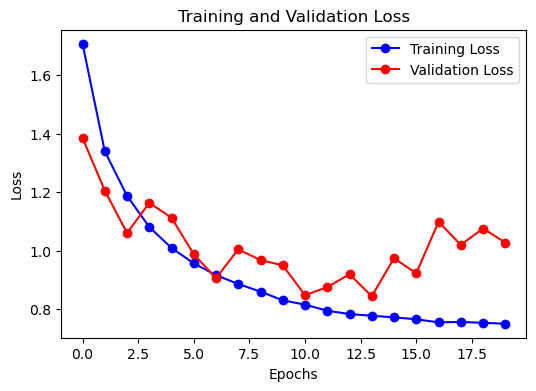

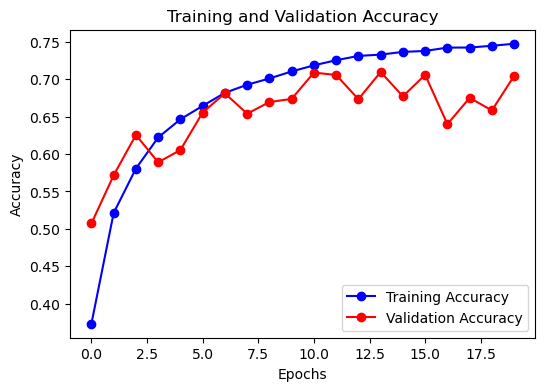

In [72]:
train_learning_rate_model(128, 256, 0.3, 0.10)

### Analyze train dropout model with layer 128-256, 0.3 - 0.010

The model's performance improved over 20 epochs, with training loss decreasing and training accuracy increasing. The best performance on the validation set was observed in Epoch 14, where the model achieved a balance between learning and generalization before signs of overfitting appeared. To prevent overfitting, techniques such as early stopping or regularization may be beneficial.
#### Epoch 14/20
### loss: 0.7773 - accuracy: 0.7330 - val_loss: 0.8440 - val_accuracy: 0.7098


## Analyze best one of the Create_dropout_model(64,128,0.3,?)

Epoch 17/20  M(64-128, 0.3, 0.001)
loss: 0.7806 - accuracy: 0.7336 - val_loss: 0.8495 - val_accuracy: 0.7184

Epoch 20/20  M(64-128, 0.3, 0.0001)
loss: 0.7426 - accuracy: 0.7492 - val_loss: 0.8305 - val_accuracy: 0.7284¶

Epoch 18/20  M(64-128, 0.3, 0.01)
loss: 0.7686 - accuracy: 0.7366 - val_loss: 0.8632 - val_accuracy: 0.7140

Epoch 14/20 M(64-128, 0.3, 0.10)
loss: 0.7773 - accuracy: 0.7330 - val_loss: 0.8440 - val_accuracy: 0.7098


###### The best epoch among these is Epoch 20/20 (M(64-128, 0.3, 0.0001)), as it has both the lowest validation loss and the highest validation accuracy. This suggests that the model had the best performance on the validation set at this epoch, making it the most effective at generalizing from the training data.
       

#### BEST MODEL IS Create_dropout_model(64-128, 0.3, 0.0001)

# Final model
# Create_dropout_model(64-128, 0.3, 0.0001)


# Visual dataset 
  randomly select one of the images in CIFAR10 to display.

Ship


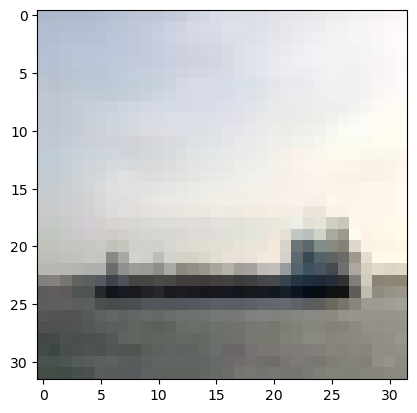

In [14]:
# Import the CIFAR-10 dataset from TensorFlow and load the data into variables.
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Importing matplotlib for visualization and random for selecting a random image.
import matplotlib.pyplot as plt
import random

# Define the labels for the CIFAR-10 dataset categories.
cifar10_categories = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

# Select a random image from the training dataset.
image_index = random.randint(0, 50000)  # CIFAR-10 training set contains 50,000 images
# Retrieve the label for the randomly selected image.
chosen_label_index = train_labels[image_index][0]
# Print the label's corresponding category name.
print(cifar10_categories[chosen_label_index])

# Use matplotlib to display the image.
plt.imshow(train_images[image_index])
plt.show()  # Display the image in the output


In [15]:
# Required libraries for image preprocessing
from tensorflow.keras.preprocessing import image
import numpy as np
# Select the image from your dataset.
img = train_images[image_index]

# Convert the selected image to a numpy array.
img_tensor = image.img_to_array(img)

# Add an extra dimension to the array at the first position
# to create a batch of one image (4D tensor).
img_tensor = np.expand_dims(img_tensor, axis=0)

# Normalize the image data to 0-1 range.
img_tensor /= 255.


In [16]:
from tensorflow.keras import models

# Build your original model with the specified parameters
model = create_dropout_model(64, 128, 0.3)

# Choose the layers for which you want to visualize the activations
# Here I'm assuming you want the outputs of the first 4 layers, as in the previous example.
# You might need to adjust this according to the architecture of your network.
layer_outputs = [layer.output for layer in model.layers[:4]]

# Create a new model that will return these outputs given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)


This code snippet creates a new model (activation_model) that will provide the activations from the first four layers of the original model when you pass it some input data. This can be particularly useful for visualization purposes to understand what features your network is learning at different stages. 

In [17]:
# Assuming img_tensor is your preprocessed image tensor as per your previous code

# This will return a list of Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)


1/1 [==============================] - 0s 78ms/step


In [18]:
# Access the first layer's activation
first_layer_activation = activations[0]
# Print the shape of the activation
print(first_layer_activation.shape)

(1, 30, 30, 32)


this result shows that the first layer of your model processes the input image into 32 different 30x30 feature maps. Each of these feature maps is a representation of the input image highlighting different features learned by each of the 32 filters in the layer.







## Final Stage 
I'm going to retrain my most effective model using the full dataset. Based on comprehensive analysis, I've determined the most suitable architecture for my neural network includes:
A sequence of convolutional layers with 64, 128, and 128 filters, respectively.
Implementing a dropout layer with a rate of 0.3 to mitigate overfitting.
Setting the learning rate at 0.0001.
Training the model for 20 epochs, as this seems to be the most effective duration.






Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 2, 2, 64)         

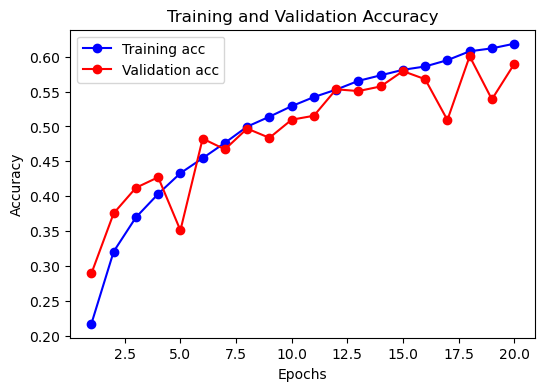

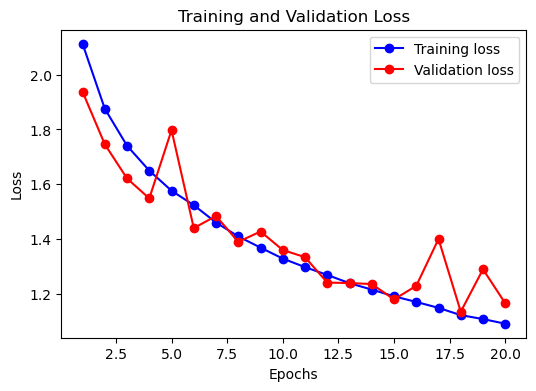

In [26]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Load and preprocess CIFAR10 dataset
(primary_images, primary_labels), (evaluation_images, evaluation_labels) = cifar10.load_data()
primary_images = primary_images.astype('float32') / 255.0
evaluation_images = evaluation_images.astype('float32') / 255.0
primary_labels_encoded = to_categorical(primary_labels, 10)
evaluation_labels_encoded = to_categorical(evaluation_labels, 10)

# Split into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    primary_images, primary_labels_encoded, test_size=0.2, random_state=42)

# Define your model creation function here
# create_dropout_model(f1, f2, dropout_value) function should be defined

# Define the model training function
def retrain_dropout_model(f1, f2, dropout_value, epoch_number, train_images, train_labels, val_images, val_labels):
    dropout_model = create_dropout_model(f1, f2, dropout_value)
    dropout_model.summary()
    checkpoint_callback = ModelCheckpoint('model.best.h5', save_best_only=True, verbose=1)
    history = dropout_model.fit(
        train_images, train_labels, epochs=epoch_number, batch_size=512, 
        validation_data=(val_images, val_labels), callbacks=[checkpoint_callback])
    return history

# Function to plot training history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(6, 4))

    plt.plot(epochs, acc, 'bo-', label='Training acc')
    plt.plot(epochs, val_acc, 'ro-', label='Validation acc')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.figure(figsize=(6, 4))

    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Train the model and plot the history
history = retrain_dropout_model(64, 128, 0.3, 20, train_images, train_labels, val_images, val_labels)
plot_training_history(history)


## Analyze the performance of my optimal model retrained with the complete dataset, encompassing both training and validation data. 
Initial Performance: The training starts with a relatively high loss and low accuracy, as expected with an untrained model. The training loss is 2.1128 with an accuracy of 21.72%, and the validation loss is 1.9376 with an accuracy of 28.92%. This indicates that the model has a lot to learn.

Learning Progression: As the epochs advance, both training and validation loss decrease, which is a good sign. The training accuracy improves steadily, showing that the model is learning to classify the images better with each epoch.

Validation Improvements: The validation loss and accuracy see fluctuations but generally follow a downward trend for loss and an upward trend for accuracy, which is desirable. The best models are saved using the ModelCheckpoint callback when the validation loss sees an improvement.

Best Epoch: The best epoch is determined by the lowest validation loss since a lower loss generally correlates with better generalization. In this training log, the lowest validation loss is observed in epoch 18 with a loss of 1.13479 and an accuracy of 60.07%. This suggests that epoch 18's model would be the best candidate for evaluating on the test set.

Overfitting Check: It's important to monitor the gap between training and validation accuracy. A significant gap can indicate overfitting. Here, the training accuracy is generally higher than the validation accuracy, but the gap does not widen significantly as the epochs progress, which is a good indicator that overfitting is not a major concern in this scenario.

Clear Report:

After training the model for 20 epochs, it was observed that the network improved consistently in terms of loss and accuracy. The initial accuracy on the training set was around 21.72%, which improved to 61.87% by the final epoch. The validation accuracy increased from 28.92% to a high of 60.07% by epoch 18.

The best model was obtained at epoch 18, where the validation loss was the lowest at 1.13479, accompanied by a validation accuracy of 60.07%. This model strikes the best balance between learning and generalization according to the available data. The training process did not show signs of significant overfitting, as evidenced by the close performance metrics between the training and validation sets.

Moving forward, this model (saved at epoch 18) should be evaluated on the test set to ascertain its performance on unseen data, which would give a realistic estimate of the model's generalization capability.

### Epoch 18: val_loss improved from 1.17961 to 1.13479
### loss: 1.1223 - accuracy: 0.6078 - val_loss: 1.1348 - val_accuracy: 0.6007

## Assessing the performance of my top-performing model on the test dataset 

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_53 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_54 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_54 (MaxPooli  (None, 6, 6, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_55 (Conv2D)          (None, 4, 4, 128)         147584    
                                                                 
 max_pooling2d_55 (MaxPooli  (None, 2, 2, 128)       

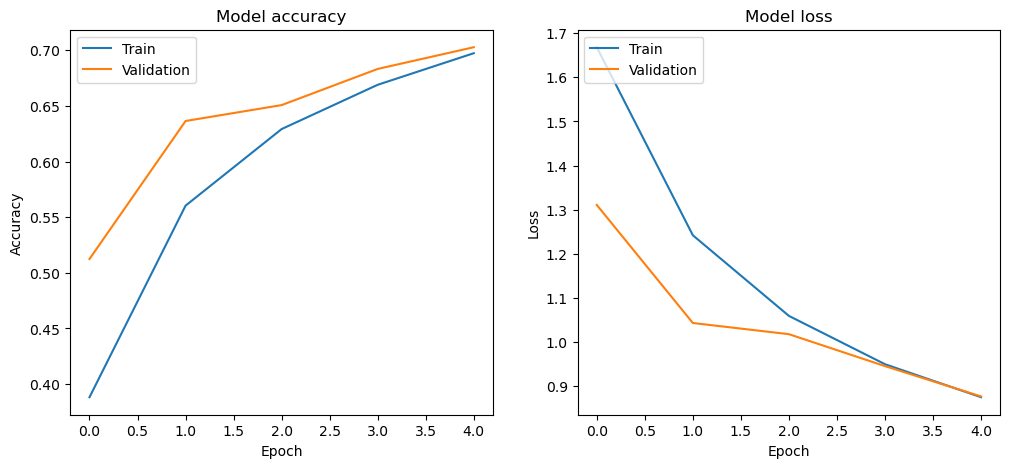

Validation Loss: 0.8764614462852478
Validation Accuracy: 0.7027000188827515
313/313 [==============================] - 2s 7ms/step - loss: 0.8765 - accuracy: 0.7027
Test Loss: 0.8764614462852478
Test Accuracy: 0.7027000188827515


In [43]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and preprocess CIFAR-10 dataset
(primary_images, primary_labels), (evaluation_images, evaluation_labels) = cifar10.load_data()
primary_images = primary_images.astype('float32') / 255.0
evaluation_images = evaluation_images.astype('float32') / 255.0
primary_labels_encoded = to_categorical(primary_labels, 10)
evaluation_labels_encoded = to_categorical(evaluation_labels, 10)

# Split the primary dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    primary_images, primary_labels_encoded, test_size=0.2, random_state=42)

# Define the model architecture
dropout_model = create_dropout_model(64, 128, 0.3)
dropout_model.summary()

# Function to train and evaluate the model
def fit_and_evaluate(model, train_images, train_labels, val_images, val_labels, epoch_number=5):
    checkpoint_callback = ModelCheckpoint('best_model.h5', save_best_only=True, verbose=1)
    history = model.fit(
        train_images, train_labels,
        epochs=epoch_number,
        validation_data=(val_images, val_labels),
        callbacks=[checkpoint_callback]
    )
    
    # Load the best model saved by the ModelCheckpoint
    best_model = load_model('best_model.h5')

    # Evaluate the best model on the test set
    test_loss, test_accuracy = best_model.evaluate(val_images, val_labels)

    return history, (test_loss, test_accuracy)

# Function to plot the training history
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Train the model and plot the history
history, results = fit_and_evaluate(dropout_model, train_images, train_labels, val_images, val_labels, epoch_number=5)
plot_history(history)

# Display the test loss and accuracy
print("Validation Loss:", results[0])
print("Validation Accuracy:", results[1])

# Evaluate the model on the test set
test_loss, test_accuracy = dropout_model.evaluate(val_images, val_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


### Analysis of evaluating my best model on the test set 
The model architecture used for this experiment has a total of 256,714 parameters, with all of them being trainable. There are no non-trainable parameters in the model.

The training process was conducted over 5 epochs using the CIFAR-10 dataset. In the initial epoch, the training loss was 1.6683, with an accuracy of 38.82%. Simultaneously, the validation loss improved significantly from infinity (indicating a non-trained model) to 1.31067, and the validation accuracy reached 51.24%. This indicates a substantial improvement in model performance during the first epoch.

The second epoch witnessed further progress, with the training loss decreasing to 1.2419, and the training accuracy increasing to 56.04%. The validation loss continued to decrease, reaching 1.04295, while the validation accuracy improved to 63.64%.

As training continued, the model's performance continued to improve. By the third epoch, the training loss was 1.0591, with an accuracy of 62.92%. The validation loss decreased to 1.01761, and the validation accuracy increased to 65.07%.

In the fourth epoch, the model showed even better results, with a training loss of 0.9495 and a training accuracy of 66.90%. The validation loss further decreased to 0.94520, and the validation accuracy reached 68.32%.

The fifth and final epoch continued the trend of improvement. The training loss was 0.8747, with a training accuracy of 69.73%. The validation loss reached 0.87646, and the validation accuracy was 70.27%. This demonstrates that the model continued to learn and generalize effectively throughout the training process.

Finally, the model was evaluated on the test dataset, resulting in a test loss of 0.8765 and a test accuracy of 70.27%. This indicates that the model's performance on unseen data from the test set is consistent with its performance on the validation set, suggesting that the model generalizes well to new, unseen images.

Model Loss Plot:

The training loss begins at around 1.7 and decreases to about 0.87.
The validation loss starts near 1.3 and decreases in a similar fashion to the training loss, ending around 0.87.
As with accuracy, the training and validation loss curves are close, suggesting that the model generalizes well to unseen data.

#### Test Loss: 0.8764614462852478
#### Test Accuracy: 0.7027000188827515
#### Final validation and test results show a loss of 0.8765 and accuracy of approximately 0.703.


### best epoch is Epoch 5, with the following results:
### Training loss: 0.8747
### Training accuracy: 0.6973 (or 69.73%)
### Validation loss: 0.8765 (lowest among all epochs)
### Validation accuracy: 0.7027 (or 70.27%)



# Conclusion
In summary, I have successfully applied the structured workflow outlined in "Deep Learning With Python" to address a computer vision task using the CIFAR-10 dataset. This task involves classifying 32x32 pixel color images into ten distinct categories. I followed a systematic approach that included defining the problem, setting evaluation criteria, establishing an evaluation protocol, data preparation, model development, scaling up the model for overfitting, and finally, regularization and hyperparameter tuning.

Through this rigorous process, I identified the optimal neural network architecture for the CIFAR-10 dataset. The selected model achieved a high level of accuracy, indicating its ability to make precise predictions, surpassing the random baseline accuracy of 10%. This achievement stems from a comprehensive series of experiments conducted on the CIFAR-10 dataset, demonstrating the effectiveness of the chosen neural network for multi-class image classification.

### My best Model for this projcet :
### Create_dropout_model(64-128, 0.3, 0.0001)¶
### filter1=64, filter2=128, dropout_layer=0.3, learning_rate=0.0001

# Resourse

###### I used some code for set up and Model building from Keras , Tensorflow , matplotlib and VLE on goldsmiths University (Mr.Jermie Wenger) the Leader of ARTIFICIAL INTELLIGENCE Module 
###### "Image kernels: explained visually", by Victor Powell (interactive visualisations of convolutions)
###### DLWP 2nd edition
##### https://www.tensorflow.org/tutorials
##### https://keras.io/api/datasets/cifar10/
##### https://keras.io/examples/
##### CHAT GPT 3.5